In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpmc1uz9xaGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

In [5]:
images = images[:6392]
masks = masks[:6392]

In [6]:
images.shape

(6392, 512, 512, 1)

In [7]:
masks.shape

(6392, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 27s 4s/step - loss: 0.6926 - dice_coeff: 0.3462 - val_loss: 0.6912 - val_dice_coeff: 0.2694
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.6915 - dice_coeff: 0.3449 - val_loss: 0.6895 - val_dice_coeff: 0.2685
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.6904 - dice_coeff: 0.3425 - val_loss: 0.6881 - val_dice_coeff: 0.2680
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.6895 - dice_coeff: 0.3438 - val_loss: 0.6868 - val_dice_coeff: 0.2676
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.6884 - dice_coeff: 0.3440 - val_loss: 0.6851 - val_dice_coeff: 0.2673
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6869 - dice_coeff: 0.3430 - val_loss: 0.6832 - val_dice_coeff: 0.2670
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6852 - dice_coeff: 0.3429 - val_loss: 0.6803 - va

In [10]:
R.classifier_scores

[[0.3575875759124756, 0.4168795645236969],
 [0.19258756935596466, 0.6965023279190063],
 [0.19068869948387146, 0.6799315810203552],
 [0.19186824560165405, 0.6887584328651428],
 [0.212528795003891, 0.6909768581390381],
 [0.19112567603588104, 0.6945109963417053],
 [0.21059393882751465, 0.711880087852478],
 [0.1856902837753296, 0.7064115405082703]]

In [11]:
R.discriminator_scores

[[0.026193680241703987, 0.9921671152114868],
 [0.019516445696353912, 0.9947780966758728],
 [0.025140967220067978, 0.9921671152114868],
 [0.014620866626501083, 0.9947780966758728],
 [0.00801519863307476, 1.0],
 [0.011491724289953709, 0.997389018535614],
 [0.009176229126751423, 1.0],
 [0.017058392986655235, 0.997389018535614]]

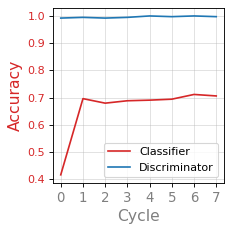

In [12]:
R.plot()